# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_1_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

In [2]:
from utility import read_all_test_data_from_path
from os import chdir,mkdir,getcwd


# Define the path to the folder 'collected_data'
base_dictionary = 'C:/Users/weing/Documents/Centrale/Maintenance/Group_5/projects/maintenance_industry_4_2024/dataset/training_data/'



# Read all the data
df = read_all_test_data_from_path(base_dictionary)
df.size
df.head()



ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

We obtain a huge dataframe that combines all the csv files.
Each column represent a feature that describe the data. For each motor, we have several information like the temperature, the voltage or the position. We also have a temporal information for the datapoint.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

- Some features are not very noisy like the position and the temperature. However, there is a lot of noise with the voltage so it needs to be smooth.

- We need to scale the features because the variation of two different features can't be compared.
- There are some outliers but not that much. We need to remove them to avoid a overfitting of the model
- No missing values...
- The temperature increases when the position is changing
- 





## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

In this visualization, we represent the distribution of features using histograms. To ensure clarity and aesthetic appeal, we choose to include only the central 99% of the data in each histogram, excluding extreme values or outliers (binrange=(df_features[column].quantile(0.01), df_features[column].quantile(0.99)). By focusing on the central portion of the distribution, we aim to provide a clear and concise summary of the data while maintaining visual consistency across the histograms.

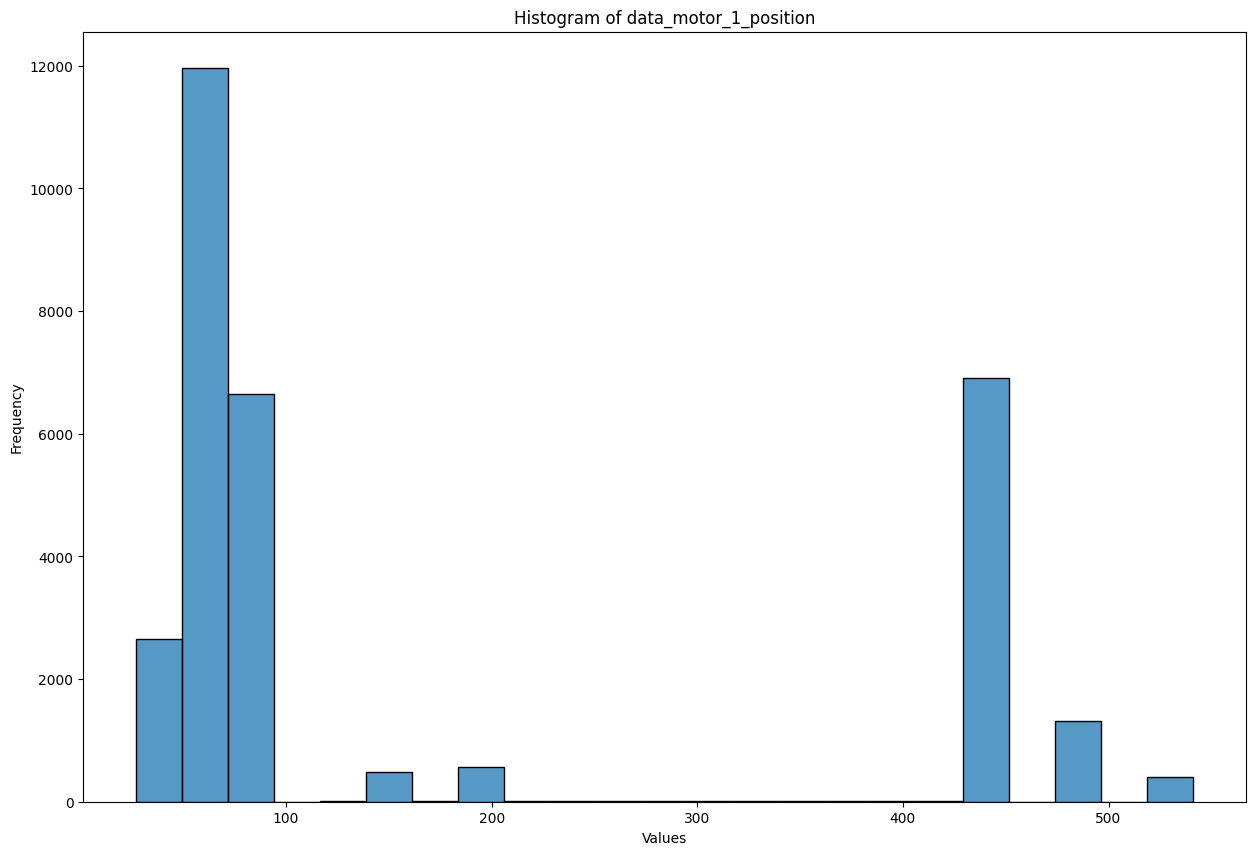

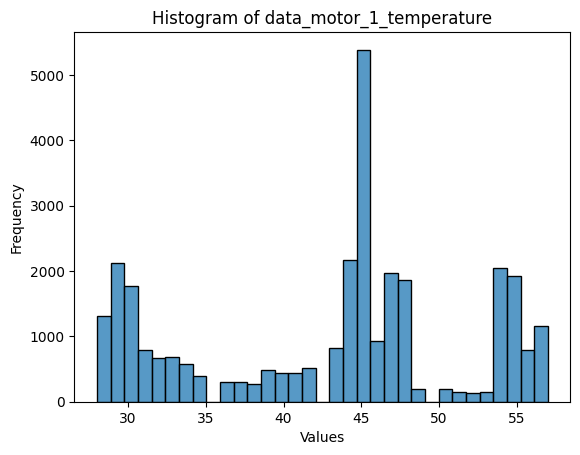

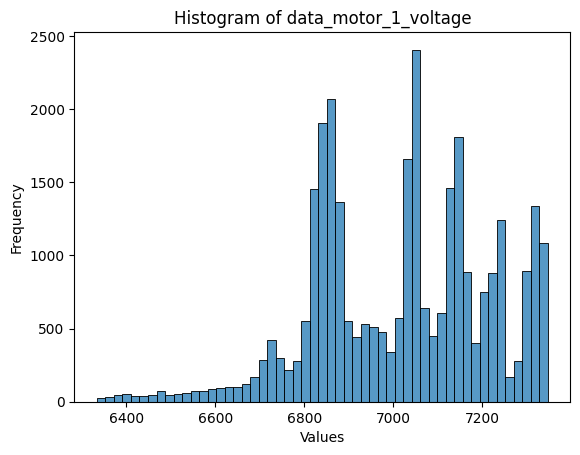

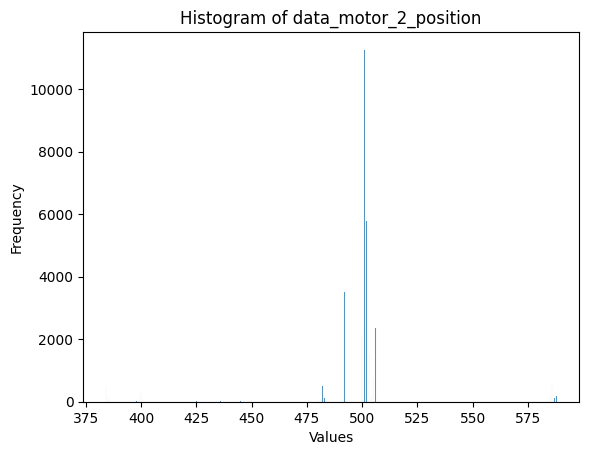

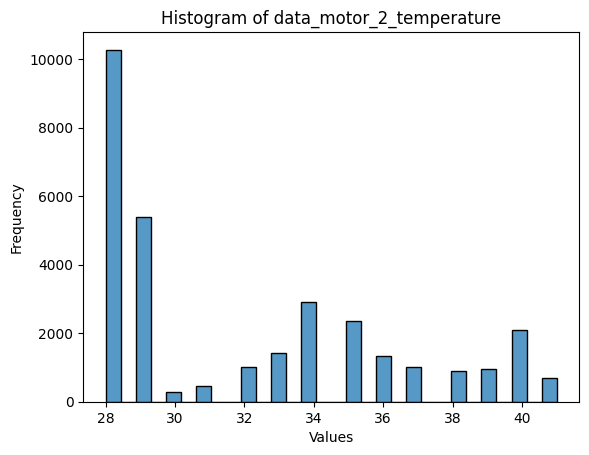

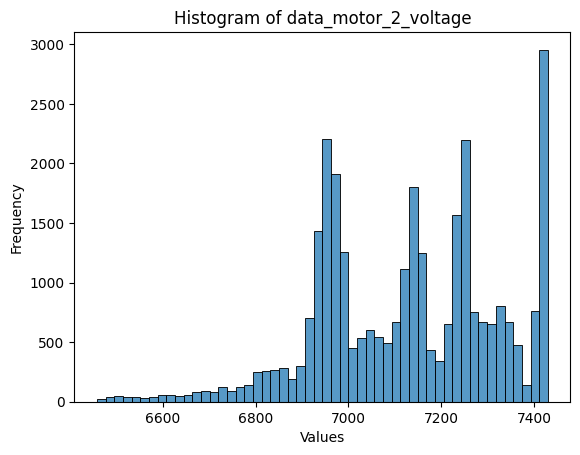

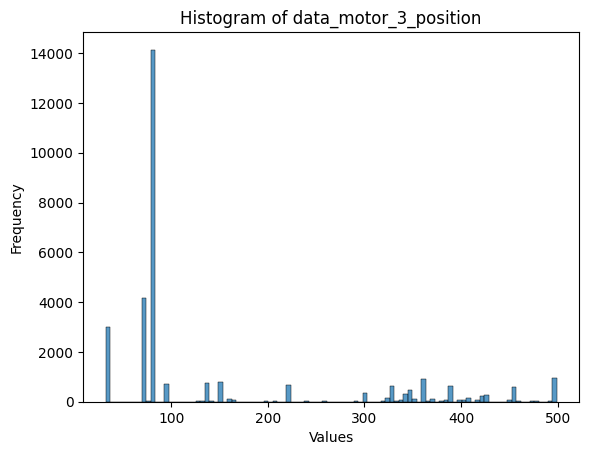

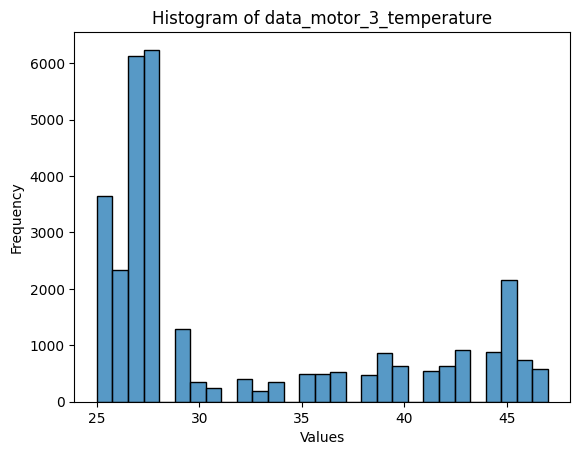

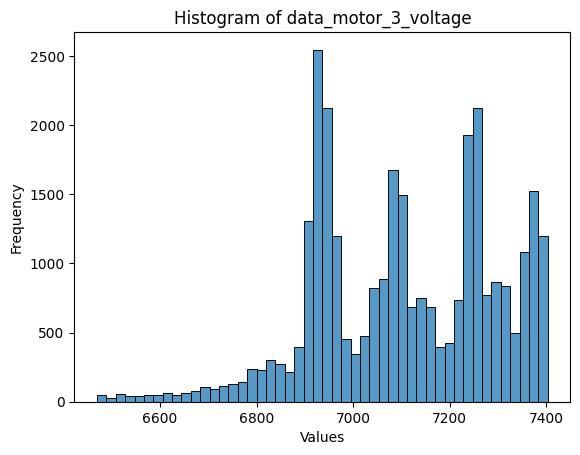

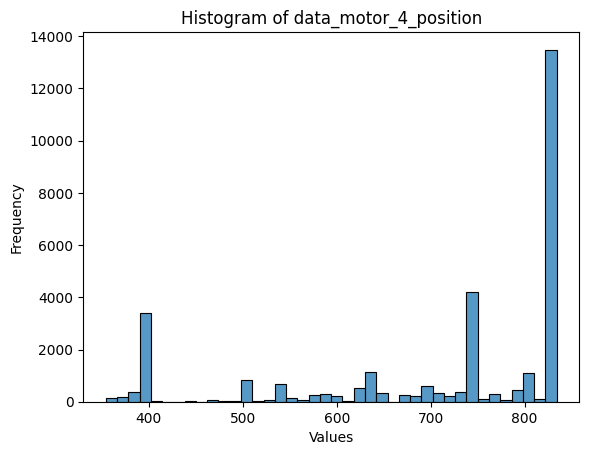

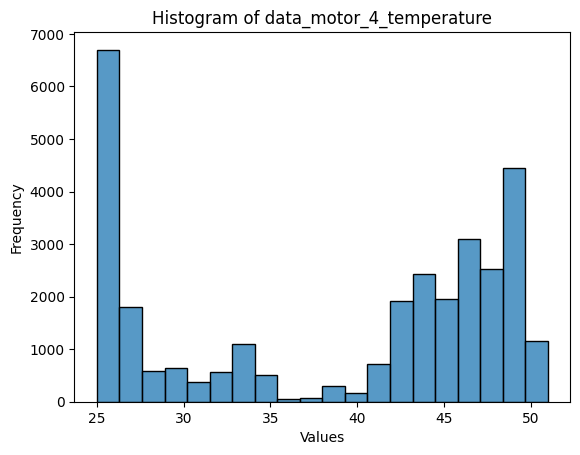

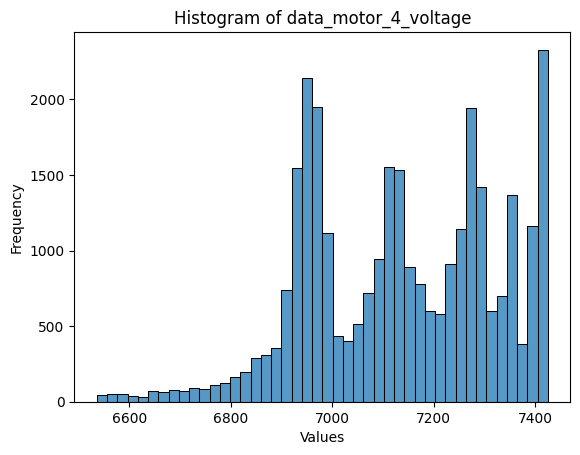

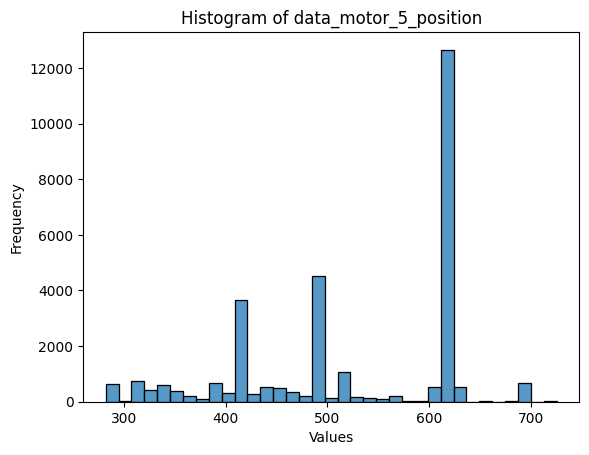

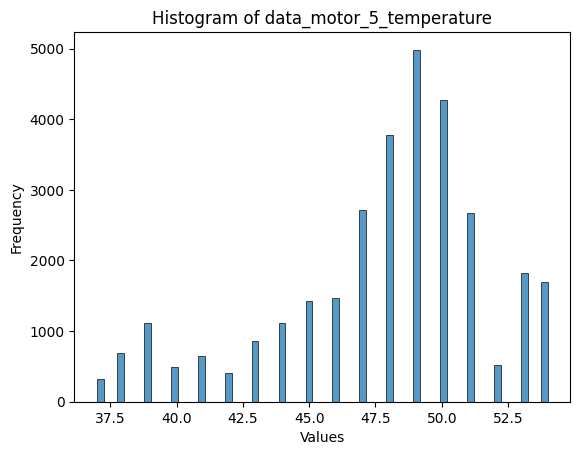

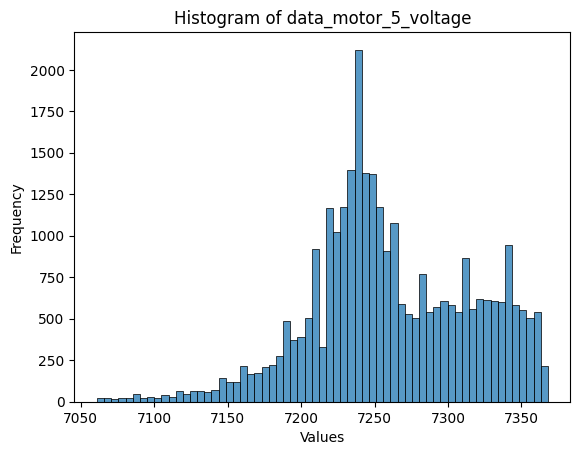

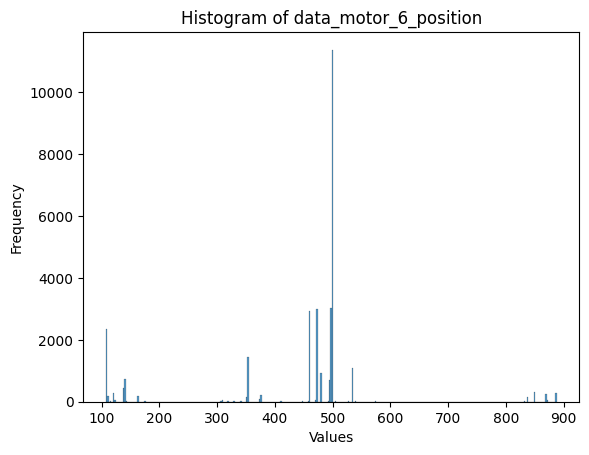

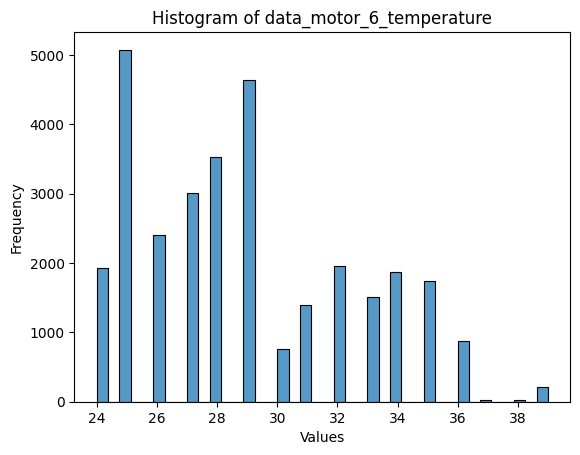

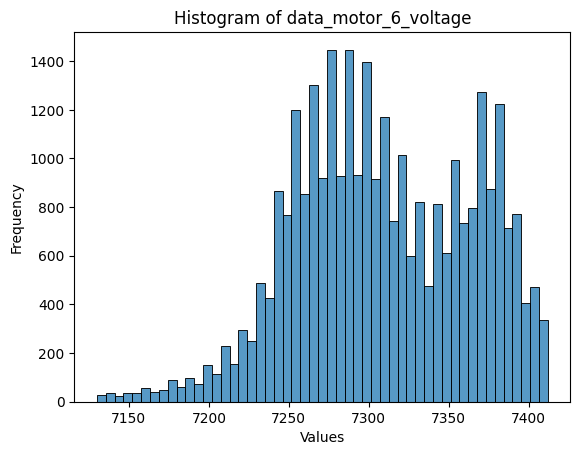

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_features=df.drop(['time','data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'], axis=1)
plt.figure(figsize=(15, 10))
for column in df_features.columns:
    sns.histplot(df_features[column], kde=False,binrange=(df_features[column].quantile(0.01), df_features[column].quantile(0.99)))
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In this visualization, we represent the distribution of features using boxplots. To accommodate all features on the same plot, we standardize the data. Removing outliers ensures that the boxes remain visible without causing the plot window to expand excessively (cf showfliers=False). This approach allows for a comprehensive overview of the distribution of each feature while maintaining clarity and consistency in the visualization.

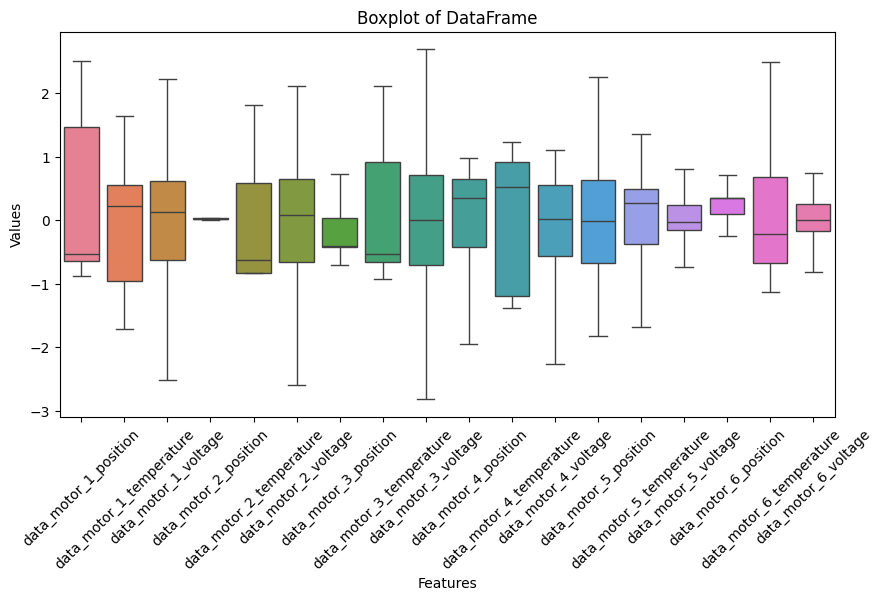

In [ ]:
#Box plot
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


plt.figure(figsize=(10,5))
sns.boxplot(data=df_normalized.drop(['time','data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'], axis=1),showfliers=False)
plt.title('Boxplot of DataFrame')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.show()


## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

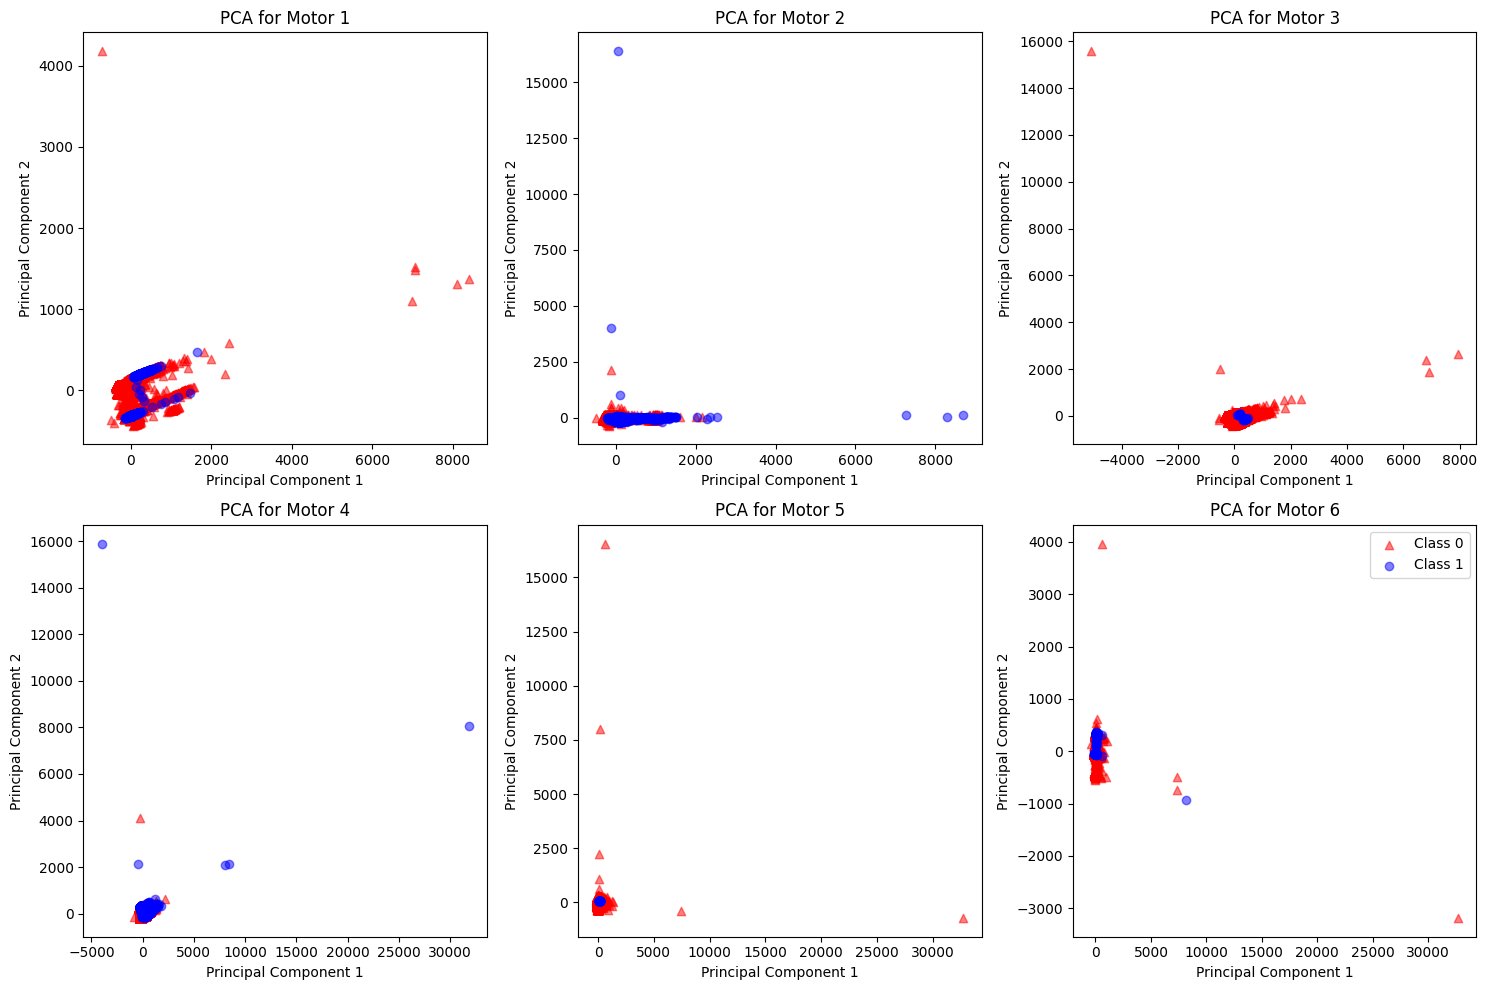

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the features (X) and the target variable (y)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for motor_num in range(1, 7):
    # Extract features for the current motor
    X = df[[f'data_motor_{motor_num}_position',  f'data_motor_{motor_num}_temperature',  f'data_motor_{motor_num}_voltage']]
    y= df[f'data_motor_{motor_num}_label']

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the results

    ax_row = (motor_num - 1) // 3
    ax_col = (motor_num - 1) % 3
    axes[ax_row, ax_col].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axes[ax_row, ax_col].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axes[ax_row, ax_col].set_title(f'PCA for Motor {motor_num}')
    axes[ax_row, ax_col].set_xlabel('Principal Component 1')
    axes[ax_row, ax_col].set_ylabel('Principal Component 2')


plt.tight_layout()
plt.legend()
plt.show()



In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

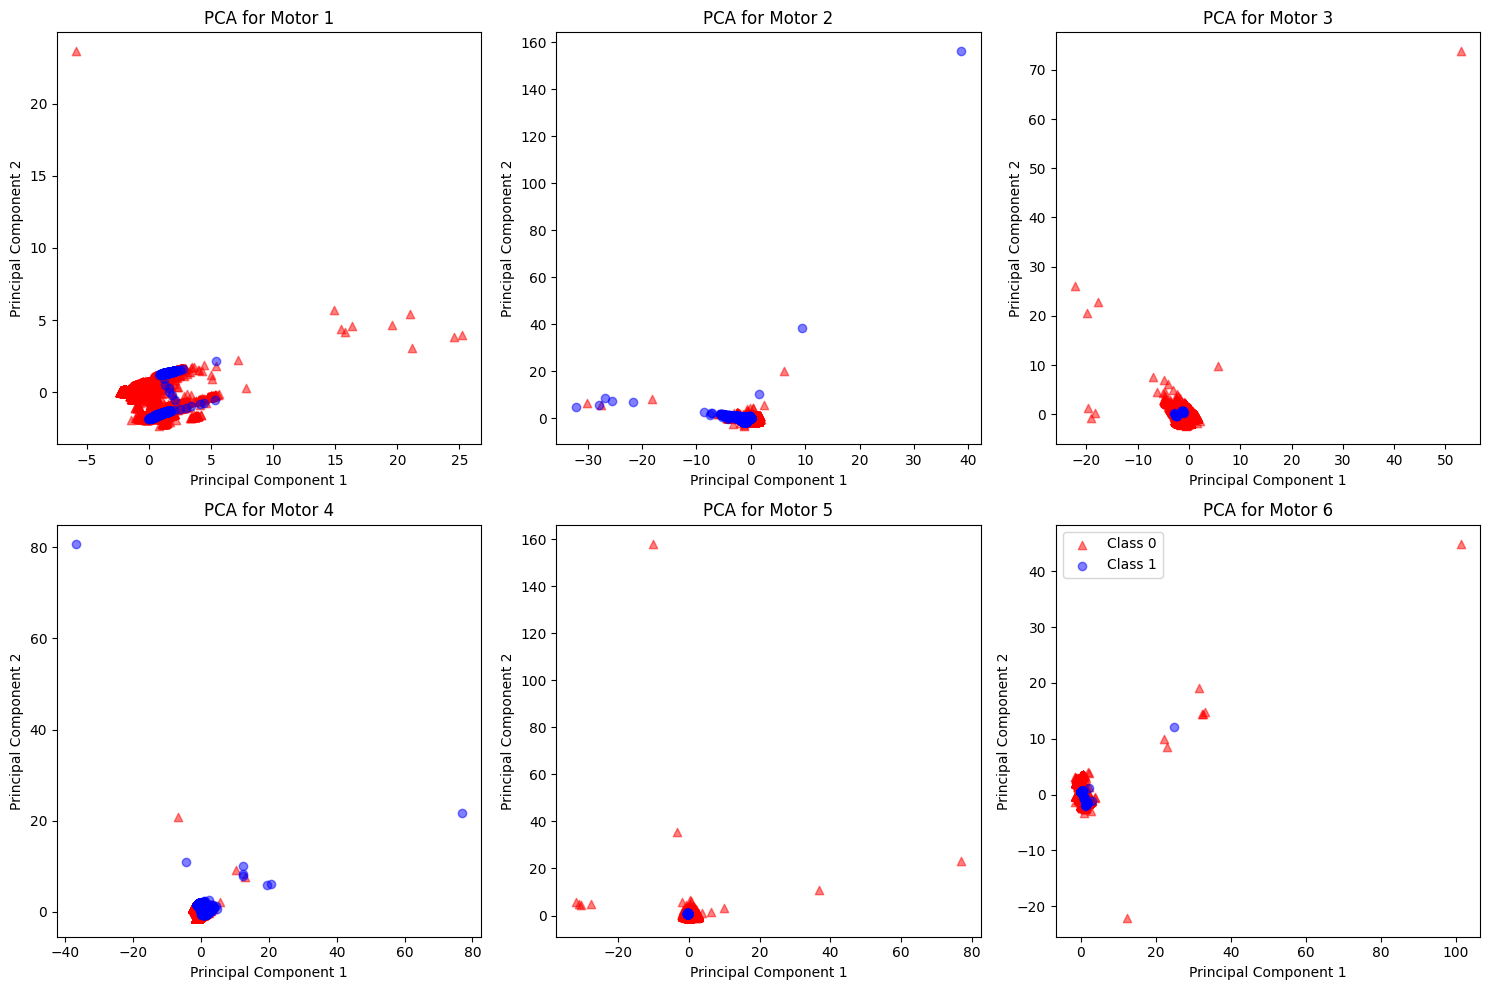

In [ ]:
#We do a standardization of the data

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

# Separate the features (X) and the target variable (y)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for motor_num in range(1, 7):
    # Extract features for the current motor
    X = df[[f'data_motor_{motor_num}_position',  f'data_motor_{motor_num}_temperature',  f'data_motor_{motor_num}_voltage']]
    y= df[f'data_motor_{motor_num}_label']

    X=scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the results

    ax_row = (motor_num - 1) // 3
    ax_col = (motor_num - 1) % 3
    axes[ax_row, ax_col].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axes[ax_row, ax_col].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axes[ax_row, ax_col].set_title(f'PCA for Motor {motor_num}')
    axes[ax_row, ax_col].set_xlabel('Principal Component 1')
    axes[ax_row, ax_col].set_ylabel('Principal Component 2')


plt.tight_layout()
plt.legend()
plt.show()



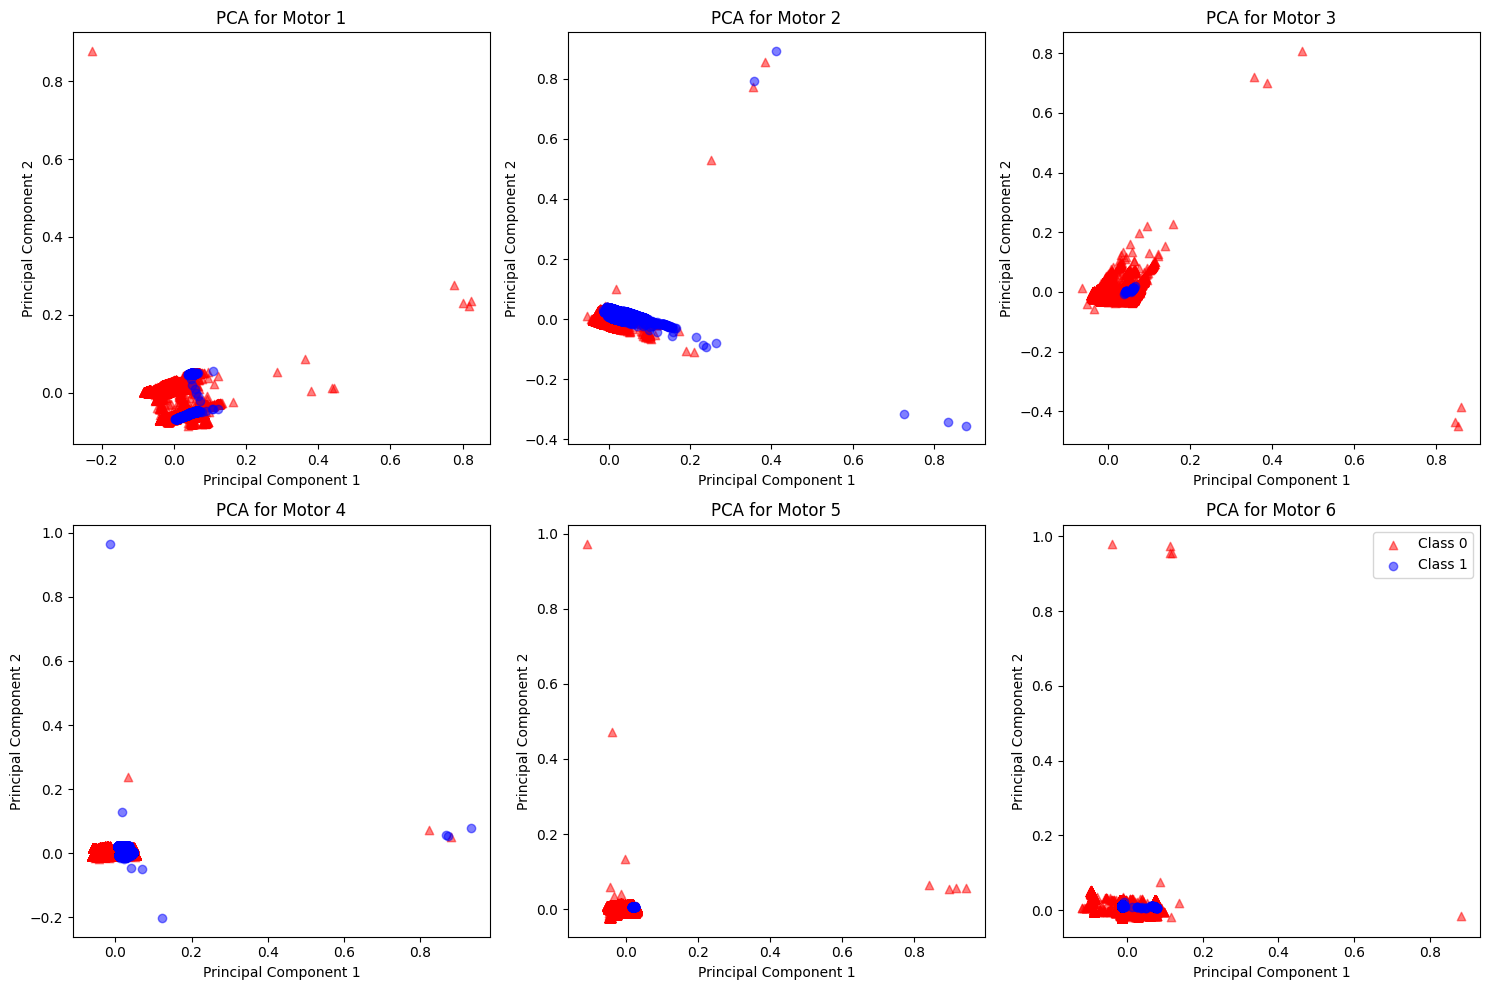

In [ ]:
#We do a normalization of the data

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# Separate the features (X) and the target variable (y)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for motor_num in range(1, 7):
    # Extract features for the current motor
    X = df[[f'data_motor_{motor_num}_position',  f'data_motor_{motor_num}_temperature',  f'data_motor_{motor_num}_voltage']]
    y= df[f'data_motor_{motor_num}_label']

    X=scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the results

    ax_row = (motor_num - 1) // 3
    ax_col = (motor_num - 1) % 3
    axes[ax_row, ax_col].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    axes[ax_row, ax_col].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    axes[ax_row, ax_col].set_title(f'PCA for Motor {motor_num}')
    axes[ax_row, ax_col].set_xlabel('Principal Component 1')
    axes[ax_row, ax_col].set_ylabel('Principal Component 2')


plt.tight_layout()
plt.legend()
plt.show()


# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

df_normalized = scaler.transform(df)


## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

**Identify outliers:** Outliers can be identified using various statistical methods such as the Z-score, the interquartile range (IQR), or domain-specific knowledge. For simplicity, let's use the IQR method, which identifies outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range.

**Remove outliers:** Once identified, outliers can be removed from the dataset. 

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

# Remove outliers from numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns
df_no_outliers = df.copy()
df_no_outliers[numerical_columns] = remove_outliers_iqr(df[numerical_columns])

# Display the cleaned DataFrame without outliers
print(df_no_outliers)

               time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                   86.0                      42.0   
1      76522.125464                   86.0                      42.0   
2      76522.225432                   86.0                      42.0   
3      76522.325432                   86.0                      42.0   
4      76522.425451                   86.0                      42.0   
...             ...                    ...                       ...   
31130  84966.426470                  195.0                      53.0   
31131  84966.526530                  195.0                      53.0   
31132  84966.626610                  195.0                      53.0   
31133  84966.726460                  195.0                      53.0   
31134  84966.826470                  195.0                      53.0   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                    7223.0                 0.0              

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

This is the method that we used to smooth the data :

**Choose a window size:** Determine the size of the window (i.e., the number of data points) over which you want to calculate the moving average. The larger the window size, the smoother the resulting curve.

**Calculate the moving average:** For each data point, calculate the average of the values within the window centered around that data point. This average value replaces the original value, resulting in a smoothed version of the data.

**Handle edge cases:** Depending on your preference and the nature of your data, you may need to handle edge cases differently. For example, at the beginning and end of the dataset where there are not enough data points to form a complete window, you may choose to use a smaller window size or pad the data with appropriate values.

In [ ]:
import pandas as pd
print(df.columns)

def smooth_data(data, window_size):
    smoothed_data = data.rolling(window=window_size, center=True).mean()
    return smoothed_data

window_size = 5

smoothed_values = smooth_data(df['data_motor_6_position'], window_size)

df['data_motor_6_positionn'] = smoothed_values

print(df)


Index(['time', 'data_motor_1_position', 'data_motor_1_temperature',
       'data_motor_1_voltage', 'data_motor_1_label', 'data_motor_2_position',
       'data_motor_2_temperature', 'data_motor_2_voltage',
       'data_motor_2_label', 'data_motor_3_position',
       'data_motor_3_temperature', 'data_motor_3_voltage',
       'data_motor_3_label', 'data_motor_4_position',
       'data_motor_4_temperature', 'data_motor_4_voltage',
       'data_motor_4_label', 'data_motor_5_position',
       'data_motor_5_temperature', 'data_motor_5_voltage',
       'data_motor_5_label', 'data_motor_6_position',
       'data_motor_6_temperature', 'data_motor_6_voltage',
       'data_motor_6_label', 'test_condition'],
      dtype='object')
               time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86               

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

C:\Users\weing\AppData\Local\Temp\ipykernel_16600\1074573456.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Features", y="Standardized Values",data=df_melted, split=True, inner="quartile", scale="count", palette="muted")
C:\Users\weing\AppData\Local\Temp\ipykernel_16600\1074573456.py:33: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="Features", y="Standardized Values",data=df_melted, split=True, inner="quartile", scale="count", palette="muted")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


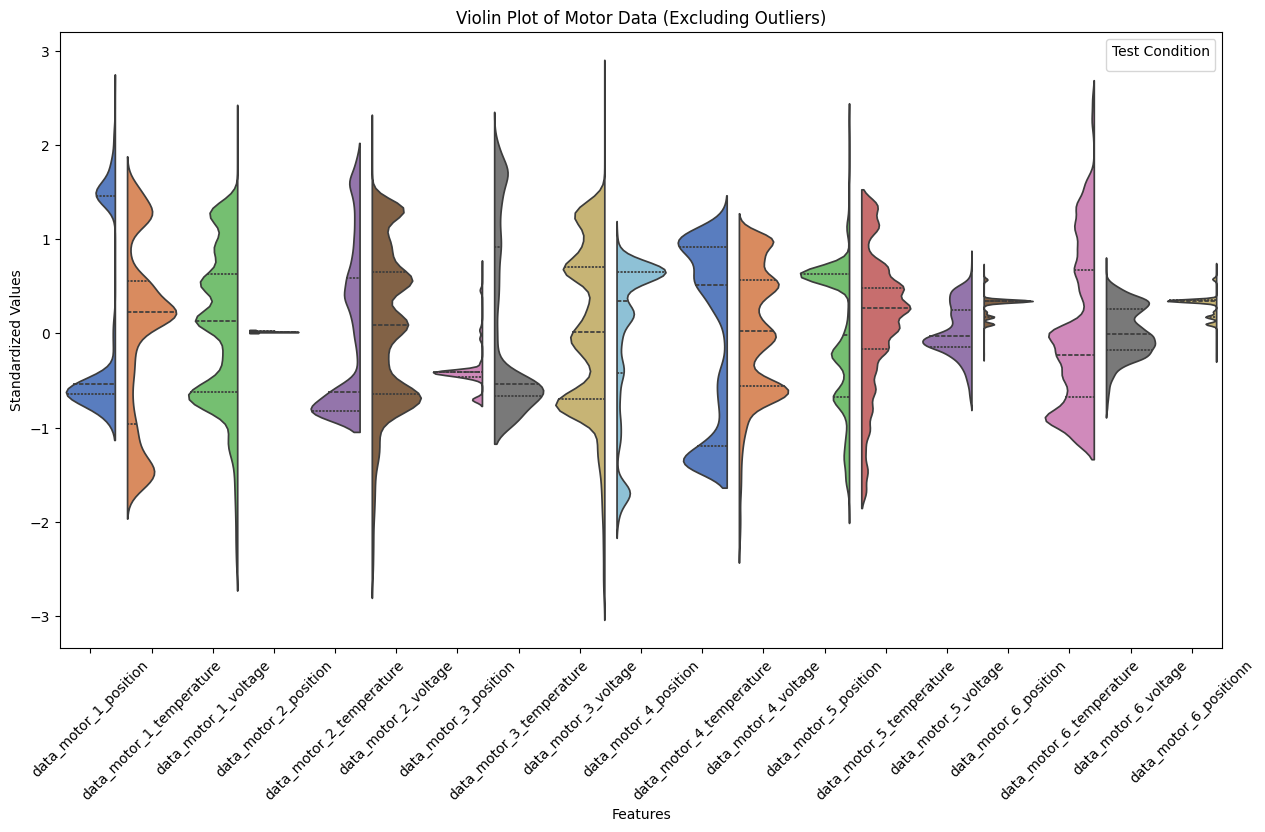

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Define a function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Apply the function to remove outliers from each column
df_filtered = df_standardized.apply(remove_outliers)

df_filtered=df_filtered.drop(['time','data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'], axis=1)


# Melt the DataFrame
df_melted = df_filtered.melt(var_name='Features', value_name='Standardized Values')


# Plot violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(x="Features", y="Standardized Values",data=df_melted, split=True, inner="quartile", scale="count", palette="muted")
plt.title('Violin Plot of Motor Data (Excluding Outliers)')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.legend(title='Test Condition')
plt.show()



## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

<Axes: >

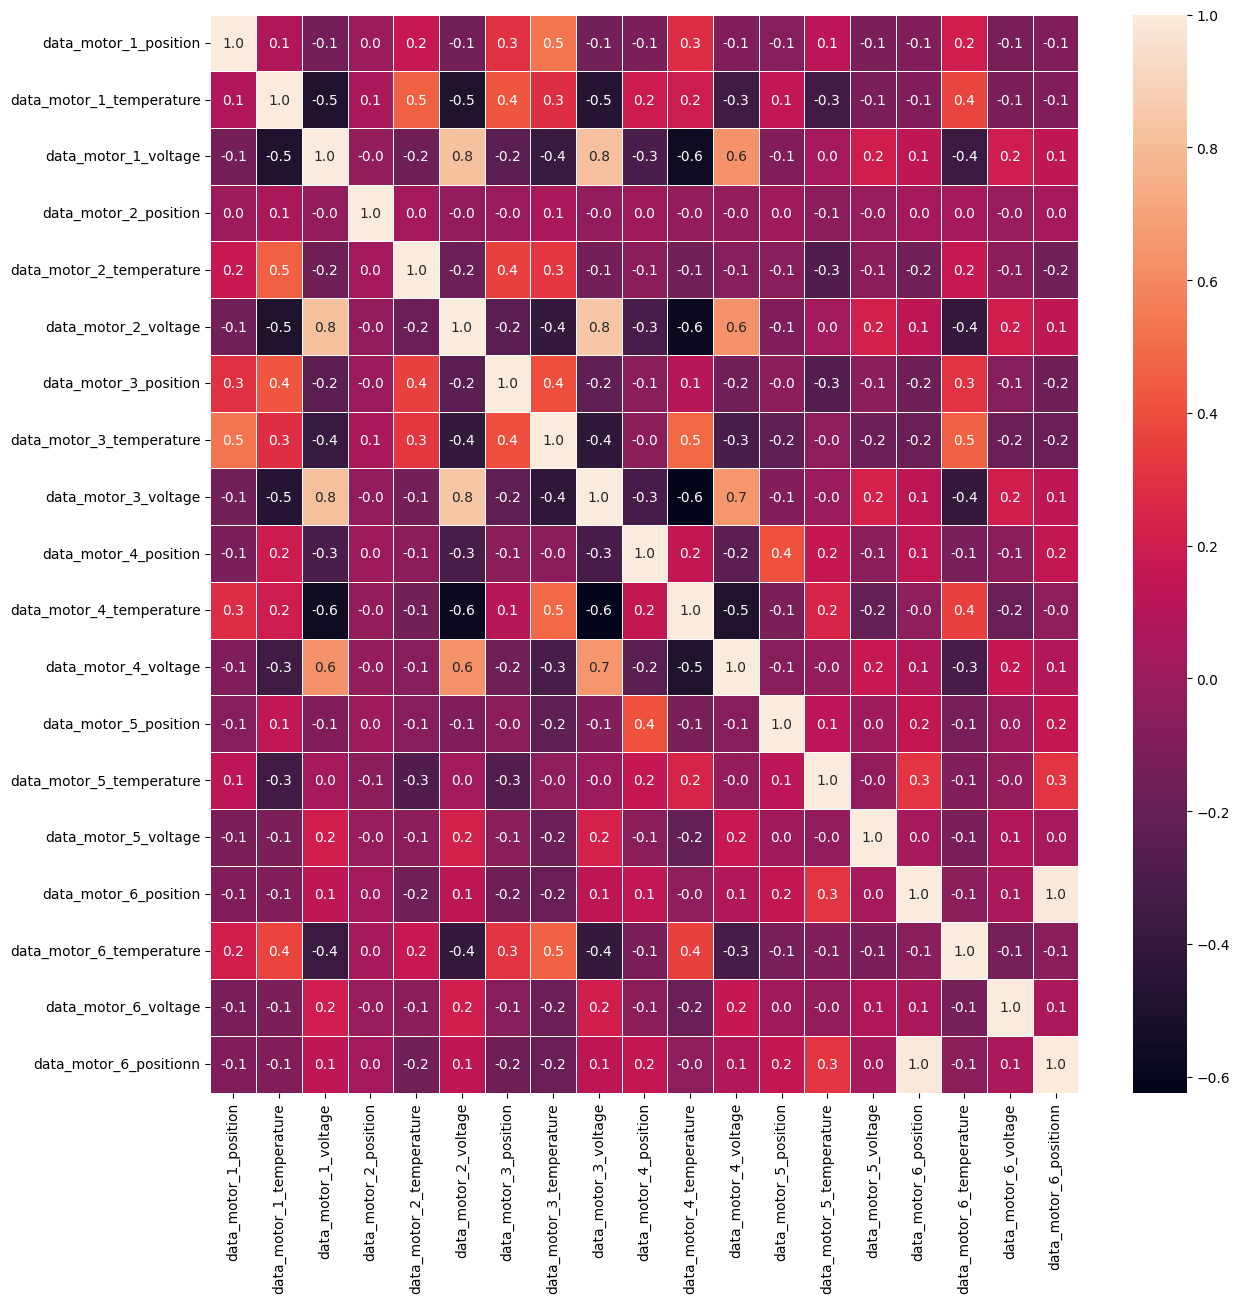

In [ ]:
#correlation map

import seaborn as sns
import matplotlib.pyplot as plt

df_features=df.drop(['time','data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'], axis=1)

f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?





After conducting feature engineering and utilizing violin plots for visual analysis, several conclusions can be drawn:

**Most Relevant Features:**
The feature "data_motor_position" appears to be highly relevant as it effectively distinguishes between different categories or classes in the dataset.
Additionally, the voltage features exhibit significant variability across different conditions, suggesting their relevance in capturing important information.

**Redundant Features:**
Features such as voltage and temperature for each motor are likely to be redundant, as they are highly correlated with each other within the same motor group.
Keeping all voltage or temperature features for each motor may introduce multicollinearity issues and provide redundant information, potentially affecting the performance and interpretability of predictive models.

**Irrelevant Features:**
Certain features may exhibit minimal variability or fail to distinguish between different groups in the dataset.
These features may be considered irrelevant for further analysis and can be safely excluded from the dataset without compromising the quality of the analysis.

**Decision on Feature Usage:**
Based on the insights from violin plots and correlation analysis, it may be prudent to retain only a subset of the voltage and temperature features, discarding redundant or highly correlated variables.
Features that demonstrate clear distinctions between categories or classes, such as "data_motor_position_1", should be prioritized for inclusion in predictive models.

By selecting the most relevant and informative features while eliminating redundant or irrelevant ones, we can streamline the dataset and improve the efficiency and effectiveness of subsequent analyses and predictive modeling tasks.

